In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
sns.set()

In [2]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax) 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix') 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [3]:
data = pd.read_csv('dataset_part_2.csv')
X = pd.read_csv('dataset_part_3.csv')

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
y = data['landing_class'].to_numpy()

In [6]:
from sklearn.preprocessing import StandardScaler
transform = StandardScaler()
X = transform.fit(X).transform(X)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [8]:
Y_test.shape

(18,)

In [9]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()

In [10]:
logreg_cv = GridSearchCV(lr, parameters, cv=10)

In [11]:
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [12]:
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


In [13]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

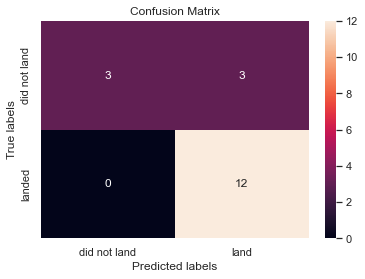

In [14]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [15]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [16]:
svm_cv = GridSearchCV(svm, parameters, cv = 10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [17]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


In [18]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

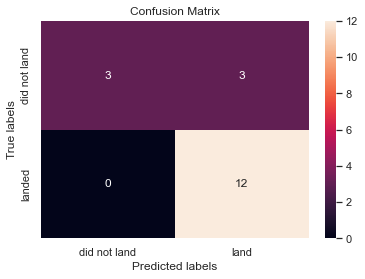

In [19]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [20]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [21]:
tree_cv = GridSearchCV(tree, parameters, cv=10)

In [22]:
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [23]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8732142857142857


In [24]:
tree_cv.score(X_test, Y_test)

0.8333333333333334

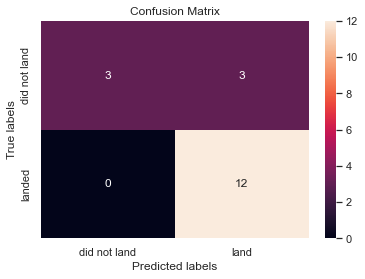

In [25]:
yhat=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [26]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [27]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [28]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8339285714285714


In [29]:
knn_cv.score(X_test, Y_test)

0.7777777777777778

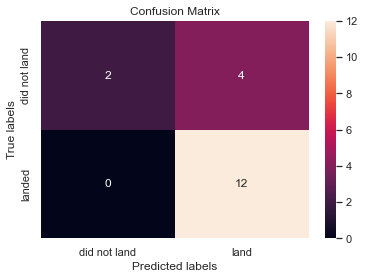

In [30]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [31]:
algorithms = {'KNN':knn_cv.best_score_,'Tree':tree_cv.best_score_,'LogisticRegression':logreg_cv.best_score_, 'SVM':svm_cv.best_score_}
bestalgorithm = max(algorithms, key=algorithms.get)
print('Best Algorithm is',bestalgorithm,'with a score of',algorithms[bestalgorithm])
if bestalgorithm == 'Tree':
    print('Best Params is :',tree_cv.best_params_)
if bestalgorithm == 'KNN':
    print('Best Params is :',knn_cv.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best Params is :',logreg_cv.best_params_)
if bestalgorithm == 'Support Vector Machine':
    print('Best Params is :',svm_cv.best_params_)

Best Algorithm is Tree with a score of 0.8732142857142857
Best Params is : {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}


In [32]:
algo_df = {'ML_Algorithm' : ['KNN', 'Tree', ' LogisticRegression', 'SVM'], 
           'Accuracy' : [knn_cv.best_score_, tree_cv.best_score_, logreg_cv.best_score_, svm_cv.best_score_]}

In [33]:
algo_df = pd.DataFrame(algo_df)
algo_df

,ML_Algorithm,Accuracy
0,KNN,0.833929
1,Tree,0.873214
2,LogisticRegression,0.821429
3,SVM,0.848214


Text(0.5, 1.0, 'ML Algorithms vs Accuracy - Train Data')

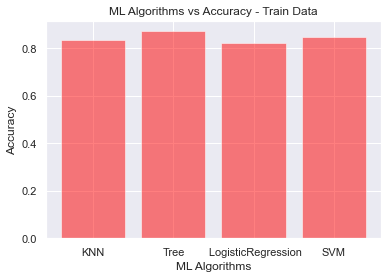

In [34]:
plt.bar(algo_df.ML_Algorithm, algo_df.Accuracy, color="red", alpha = 0.5)
plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy")
plt.title("ML Algorithms vs Accuracy - Train Data")

In [35]:
Test_Accuracy = {'KNN_Test':knn_cv.score(X_test, Y_test), 'Tree_Test':tree_cv.score(X_test, Y_test), 'SVM_Test': svm_cv.score(X_test, Y_test), 
'Log_Test':logreg_cv.score(X_test, Y_test)}

bestalgorithm = max(Test_Accuracy, key=Test_Accuracy.get)
print('Best Algorithm is',bestalgorithm,'with a score of',Test_Accuracy[bestalgorithm])

Best Algorithm is Tree_Test with a score of 0.8333333333333334


In [36]:
algo_df_test = {'ML_Algrithm' : ['KNN', 'Tree', ' LogisticRegression', 'SVM'], 
           'Accuracy' : [knn_cv.score(X_test, Y_test), tree_cv.score(X_test, Y_test), 
                         logreg_cv.score(X_test, Y_test), svm_cv.score(X_test, Y_test)]}

algo_df_test = pd.DataFrame(algo_df_test)
algo_df_test

,ML_Algrithm,Accuracy
0,KNN,0.777778
1,Tree,0.833333
2,LogisticRegression,0.833333
3,SVM,0.833333


Text(0.5, 1.0, 'ML Algorithms vs Accuracy - Test Data')

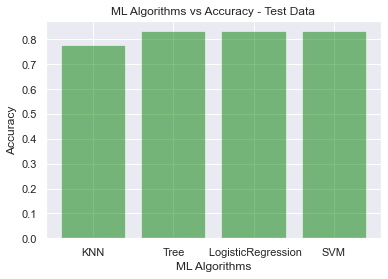

In [37]:
plt.bar(algo_df_test['ML_Algrithm'], algo_df_test['Accuracy'], color="green", alpha = 0.5)
plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy")
plt.title("ML Algorithms vs Accuracy - Test Data")